### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [ ]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')

display(df.head(5))

print(df.info())

df.loc[df['DiscountRate'].isnull(), 'DiscountRate'] = 0

print(df.info())



,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    

In [16]:
print(df.dtypes)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

print(df.dtypes)

OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
TotalRevenue      int64
dtype: object
OrderID                  int64
Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country                 object
DiscountRate           float64
TotalRevenue             int64
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [41]:
# df['TotalRevenue'] = df['Quantity'] * df['Price']

day_df = df.set_index(df['OrderDate'])

print(day_df['TotalRevenue'].resample('ME').sum())

cat_group = df.groupby('Category')

print(cat_group['TotalRevenue'].agg('sum').sort_values(ascending=False).head(3))

country_group = df.groupby('Country')

country_group['TotalRevenue'].agg('sum').sort_values(ascending=False).head(5).index


OrderDate
2023-10-31     392000
2023-11-30     995000
2023-12-31     920000
2024-01-31     905000
2024-02-29     565000
2024-03-31     703000
2024-04-30     288000
2024-05-31     930000
2024-06-30    1365000
2024-07-31     712000
2024-08-31     635000
2024-09-30     319000
2024-10-31     190000
Freq: ME, Name: TotalRevenue, dtype: int64
Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


Index(['미국', '독일', '중국', '일본', '대한민국'], dtype='object', name='Country')

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [ ]:
customer_group = df.groupby('CustomerID')

print(customer_group.agg({'TotalRevenue': 'sum'}).sort_values('TotalRevenue', ascending=False).head(5))

print(customer_group.agg('size').sort_values(ascending=False).head(5))

age_df = df.copy()
age_df['Birthdate'] = pd.to_datetime(age_df['Birthdate'])
age_df['Year'] = age_df['Birthdate'].map(lambda x:x.year // 10 * 10)
# age_group = age_df.groupby(['Year', 'Category'])

# age_group = age_group.size()
# print(age_group)
age_group = age_df.groupby('Year')['Category'].agg(lambda x:x.mode())
age_group

# age_df.groupby('Year')['Category'].value_counts(sort=True, ascending=False)

# age_df['Category'].resample('YE').count()

            TotalRevenue
CustomerID              
1007              334000
1354              245000
1141              241000
1589              215000
1632              192000
CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
dtype: int64


Year
1960              Beauty
1970               Books
1980     [Beauty, Books]
1990                Food
2000    [Beauty, Sports]
Name: Category, dtype: object

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [164]:
print(df['Product'].value_counts().sort_values(ascending=False).head(5))

print(cat_group['Product'].agg(lambda x:x.mode()))

product_group = df.groupby('Product')

product_group['Quantity'].sum().sort_values(ascending=False).head(3).index


Product
역사책    7
셔츠     7
립스틱    7
소설     7
화장품    6
Name: count, dtype: int64
Category
Beauty               립스틱
Books          [소설, 역사책]
Clothing              셔츠
Electronics          노트북
Food           [과자, 초콜릿]
Sports               축구공
Name: Product, dtype: object


Index(['셔츠', '립스틱', '소설'], dtype='object', name='Product')

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

Country  OrderDate          
대한민국     2023-10-08 05:49:00    1
         2023-12-26 10:09:00    1
         2024-01-04 11:13:00    1
         2024-01-09 08:49:00    1
         2024-01-18 21:37:00    1
                               ..
중국       2024-07-26 23:55:00    1
         2024-08-23 02:17:00    1
         2024-09-06 01:14:00    1
         2024-09-13 07:15:00    1
         2024-09-16 17:13:00    1
Name: count, Length: 120, dtype: int64


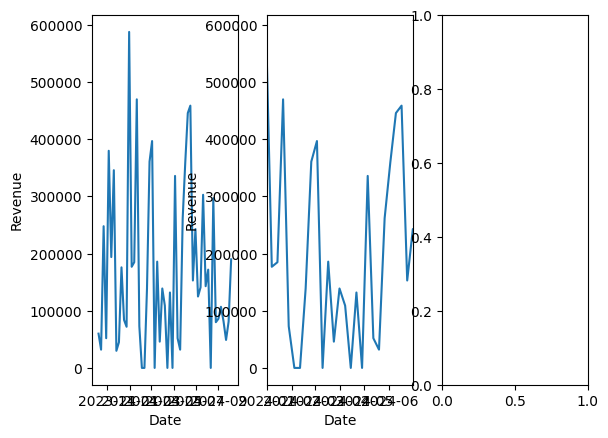

In [ ]:
from datetime import datetime
fig, axes = plt.subplots(1, 3)

week_df = df.set_index(df['OrderDate'])
week_df = week_df.resample('W')

week_revenue = week_df["TotalRevenue"].sum()

axes[0].plot(week_revenue.index, week_revenue.values)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Revenue')


axes[1].plot(week_revenue.index, week_revenue.values)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Revenue')
axes[1].set_xlim(datetime(2024, 1, 1), datetime(2024, 6, 30))

# plt.show()


In [192]:

country_group = df.groupby('Country')
print(country_group['OrderDate'].value_counts())



Country  OrderDate          
대한민국     2023-10-08 05:49:00    1
         2023-12-26 10:09:00    1
         2024-01-04 11:13:00    1
         2024-01-09 08:49:00    1
         2024-01-18 21:37:00    1
                               ..
중국       2024-07-26 23:55:00    1
         2024-08-23 02:17:00    1
         2024-09-06 01:14:00    1
         2024-09-13 07:15:00    1
         2024-09-16 17:13:00    1
Name: count, Length: 120, dtype: int64


6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [218]:
print((customer_group.size() > 1).sum() / len(customer_group))

df.loc[:, ['Category', 'DiscountRate', 'TotalRevenue']]

cat_group['DiscountRate'].mean()

# plt.show()


0.08108108108108109


Category
Beauty         0.186522
Books          0.170000
Clothing       0.154000
Electronics    0.175789
Food           0.166522
Sports         0.179444
Name: DiscountRate, dtype: float64